# Efficient AD Model For Anomaly Detection

# Summary

- Introduction
- Before running the notebook
- Different Model testing for easiest cookies type (cookies 3)
- Create model for cookies 2
- Create model for cookies 1

## Introduction

The approach is called **EfficientAD**.  
It is a anomaly detection models that takes few milliseconds on a modern GPU to do an inference.

More on [Arxiv](https://arxiv.org/abs/2303.14535)

It creates three models:  
    - Student  
    - Teacher  
    - Auto encoder

This notebooks is used to train multiple models and using [MLFLOW](https://mlflow.org/) to store the images on a remote t2.micro instance on AWS.

The model is trained on a g4dn.xlarge instance.  
If you want to train it on the same instance, make sure to create a support ticket on AWS requesting to have access on the "G series" instances in your region.

## Before running the notebook

Let's prepare the environement before running the notebook.

1. Do you have the datasets ? Download it [here](https://drive.google.com/file/d/19VM3RtzVFyDZ4s0HKJ8eVMnijAKEJdRJ/view?usp=drive_link) and extract it in the `notebooks` folder

2. Run the following command in the terminal from the **`ai`** folder.
```sh
conda create -p envs/2_efficientad python=3.11.7 -y
conda activate envs/2_efficientad

pip install -r requirements/2_efficientad.txt
```

## Model Creation

In [1]:
import sys  # Import the sys module, required to access system-specific parameters and functions  
sys.path.append('../code/')  # Add the '../code/' directory to the path that Python looks in for files to import  
  
# Import all functions from the efficientad_fns module  
from efficientad_fns import *

In [2]:

# Define a dictionary to hold configuration parameters  
config = {  
    "seed": 42,  # Seed for random number generation for reproducibility  
    "on_gpu": torch.cuda.is_available(),  # Boolean flag to use GPU if available  
      
    "out_channels": 384,  # Number of output channels in the model  
    "image_size": 256,  # Size of input images  
      
    "model_type": "small",  # Type of model, identified here as 'small'  
      
    "dataset_path": "datasets",  # Path to the datasets directory  
    "subdataset": "cookies_3",  # Specific sub-dataset to use  
      
    "output_dir": "../output",  # Directory to save output files  
    
    # Usage of weight_path
    # "weight_path": "../weights/teacher_small.pth",
    # Download the model here: https://github.com/nelson1425/EfficientAD/tree/main/models
    # Or pretrain it yourself here: https://github.com/nelson1425/EfficientAD/blob/main/pretraining.py
    "weight_path": "",  # Path to pre-trained weights (empty means no pre-loading)  
      
    # "mlflow_tracking_uri": "",  # URI for MLflow tracking server  
    "mlflow_tracking_uri": "http://3.90.103.58:5000/",  # URI for MLflow tracking server  
      
    "train_steps": 20,  # Number of training steps  
    "learning_rate": 1e-4,  # Learning rate for model training  
    "weight_decay": 1e-5,  # Weight decay for regularization  
}  

### Different Model testing for easiest cookies type (cookies 3)

- Step = 20,    model = small, weight = none
- Step = 500,   model = small, weight = none
- Step = 5000,  model = small, weight = none
- Step = 10000, model = small, weight = none
- Step = 70000, model = small, weight = none

---

- Step = 20,    model = medium, weight = none
- Step = 500,   model = medium, weight = none
- Step = 5000,  model = medium, weight = none
- Step = 10000, model = medium, weight = none
- ~~Step = 70000, model = medium, weight = none~~

---

- Step = 20,    model = small, weight = on
- Step = 500,   model = small, weight = on
- Step = 5000,  model = small, weight = on
- Step = 10000, model = small, weight = on
- ~~Step = 70000, model = small, weight = on~~

---

- Step = 20,    model = medium, weight = on
- Step = 500,   model = medium, weight = on
- Step = 5000,  model = medium, weight = on
- Step = 10000, model = medium, weight = on
- ~~Step = 70000, model = medium, weight = on~~

- Setting seed to 42
- OK - Setting seed to 42 (1.09 ms)

- Setting datasets path
     Dataset paths: dict_keys(['anomaly_lvl_1_test_paths', 'anomaly_lvl_2_test_paths', 'anomaly_lvl_3_test_paths', 'no_anomaly_test_paths', 'all_anomaly_test_paths', 'train_paths', 'test_paths', 'val_paths'])
- OK - Setting datasets path (3.26 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_20_small
- OK - Setting config (4.36 ms)

- Prepare teacher, student & autoencoder
     No weight to load
     Training
- OK - Prepare teacher, student & autoencoder (254.78 ms)

- Normalizing teacher


    Computing std of features: 100%|██████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 51.77it/s]


- OK - Normalizing teacher (2.97 s)

- Train


       Current loss: 23.5000  :   5%|████▎                                                                                 | 1/20 [00:02<00:45,  2.37s/it]

F1 Validation 0.6451612903225806


       Current loss: 100.5513  : 100%|████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.31it/s]


- OK - Train (4.64 s)

- Saving models to ../output/cookies_3_steps_20_small/all_models.pth
- OK - Saving models (69.14 ms)

- Saving map normalization to ../output/cookies_3_steps_20_small/map_normalization.pth


     Map normalisation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 28.75it/s]


- OK - Saving map normalization (1008.84 ms)

- Evaluating model


     inference test: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.03it/s]


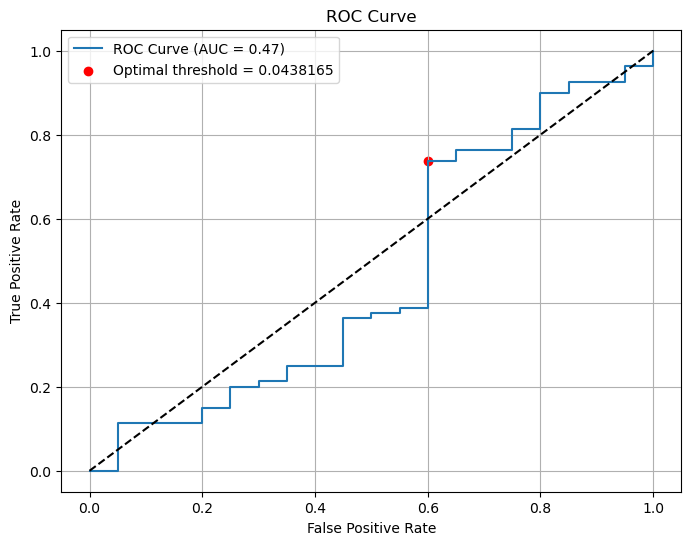


     - AUC: 46.56%
    - Optimal Threshold: 0.0438165
    - F1 Score: 0.78
    - CONFUSION MATRIX:
 [[ 8 12]
 [21 59]] 



    inference all anomaly test: 100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.14it/s]


    inference no anomaly test: 100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 22.19it/s]



- OK - Evaluating model (13.78 s)

Dataset               F1 Score
------------------------------
Anonaly lvl 1 test        0.93
Anonaly lvl 2 test        0.86
Anonaly lvl 3 test        0.62

Anomaly all test          0.86

No Anomaly Test           0.57

All test                  0.78


In [3]:
# STEPS = 20, MODEL TYPE = SMALL, WEIGHT = none
model1 = EfficientAD({**config, "train_steps": 20, "model_type": "small", "weight_path":""})
model1.create_model()
model1.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.75 ms)

- Setting datasets path
     Dataset paths: dict_keys(['anomaly_lvl_1_test_paths', 'anomaly_lvl_2_test_paths', 'anomaly_lvl_3_test_paths', 'no_anomaly_test_paths', 'all_anomaly_test_paths', 'train_paths', 'test_paths', 'val_paths'])
- OK - Setting datasets path (4.08 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_500_small
- OK - Setting config (3.91 ms)

- Prepare teacher, student & autoencoder
     No weight to load
     Training
- OK - Prepare teacher, student & autoencoder (65.90 ms)

- Normalizing teacher


    Computing std of features: 100%|██████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 51.61it/s]


- OK - Normalizing teacher (2.80 s)

- Train


       Current loss: 23.5000  :   0%|▏                                                                                    | 1/500 [00:01<13:07,  1.58s/it]

F1 Validation 0.6451612903225806


       Current loss: 14.7164  :  20%|████████████████▊                                                                  | 101/500 [00:15<03:20,  1.99it/s]

F1 Validation 0.7878787878787878


       Current loss: 6.1046  :  40%|█████████████████████████████████▊                                                  | 201/500 [00:28<02:31,  1.98it/s]

F1 Validation 0.85


       Current loss: 6.5540  :  60%|██████████████████████████████████████████████████▌                                 | 301/500 [00:42<01:40,  1.98it/s]

F1 Validation 0.85


       Current loss: 4.9979  :  80%|███████████████████████████████████████████████████████████████████▎                | 401/500 [00:56<00:50,  1.97it/s]

F1 Validation 0.7096774193548387


       Current loss: 4.3021  : 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:08<00:00,  7.29it/s]


- OK - Train (68.59 s)

- Saving models to ../output/cookies_3_steps_500_small/all_models.pth
- OK - Saving models (79.69 ms)

- Saving map normalization to ../output/cookies_3_steps_500_small/map_normalization.pth


     Map normalisation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 28.58it/s]


- OK - Saving map normalization (1013.53 ms)

- Evaluating model


     inference test: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 21.98it/s]


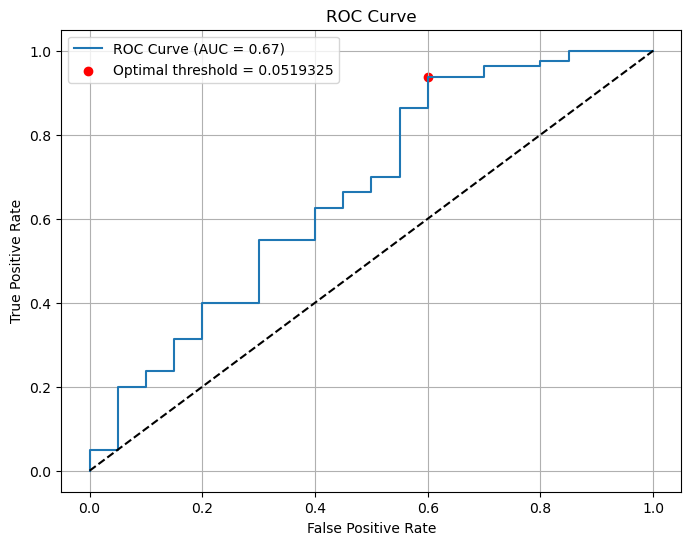


     - AUC: 66.62%
    - Optimal Threshold: 0.0519325
    - F1 Score: 0.90
    - CONFUSION MATRIX:
 [[ 8 12]
 [ 5 75]] 



    inference all anomaly test: 100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.06it/s]


    inference no anomaly test: 100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 22.02it/s]



- OK - Evaluating model (13.85 s)

Dataset               F1 Score
------------------------------
Anonaly lvl 1 test        0.93
Anonaly lvl 2 test        1.00
Anonaly lvl 3 test        1.00

Anomaly all test          0.97

No Anomaly Test           0.57

All test                  0.90


In [4]:
# STEPS = 500, MODEL TYPE = SMALL, WEIGHT = none
model2 = EfficientAD({**config, "train_steps": 500, "model_type": "small", "weight_path":""})
model2.create_model()
model2.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.82 ms)

- Setting datasets path
     Dataset paths: dict_keys(['anomaly_lvl_1_test_paths', 'anomaly_lvl_2_test_paths', 'anomaly_lvl_3_test_paths', 'no_anomaly_test_paths', 'all_anomaly_test_paths', 'train_paths', 'test_paths', 'val_paths'])
- OK - Setting datasets path (4.21 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_5000_small
- OK - Setting config (4.03 ms)

- Prepare teacher, student & autoencoder
     No weight to load
     Training
- OK - Prepare teacher, student & autoencoder (61.64 ms)

- Normalizing teacher


    Computing std of features: 100%|██████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 50.12it/s]


- OK - Normalizing teacher (2.85 s)

- Train


       Current loss: 23.5000  :   0%|                                                                                  | 1/5000 [00:01<2:12:18,  1.59s/it]

F1 Validation 0.6451612903225806


       Current loss: 14.7530  :   2%|█▋                                                                                | 101/5000 [00:15<41:08,  1.98it/s]

F1 Validation 0.75


       Current loss: 6.0656  :   4%|███▎                                                                               | 201/5000 [00:28<40:06,  1.99it/s]

F1 Validation 0.8205128205128205


       Current loss: 6.4918  :   6%|████▉                                                                              | 301/5000 [00:42<39:44,  1.97it/s]

F1 Validation 0.6666666666666666


       Current loss: 4.9741  :   8%|██████▋                                                                            | 401/5000 [00:56<38:45,  1.98it/s]

F1 Validation 0.7096774193548387


       Current loss: 5.8714  :  10%|████████▎                                                                          | 501/5000 [01:10<38:00,  1.97it/s]

F1 Validation 0.8717948717948718


       Current loss: 5.3687  :  12%|█████████▉                                                                         | 601/5000 [01:24<37:03,  1.98it/s]

F1 Validation 0.8


       Current loss: 3.4545  :  14%|███████████▋                                                                       | 701/5000 [01:37<36:05,  1.99it/s]

F1 Validation 0.5714285714285714


       Current loss: 5.2899  :  16%|█████████████▎                                                                     | 801/5000 [01:51<35:46,  1.96it/s]

F1 Validation 0.625


       Current loss: 2.3064  :  18%|██████████████▉                                                                    | 901/5000 [02:05<34:36,  1.97it/s]

F1 Validation 0.6875


       Current loss: 3.9667  :  20%|████████████████▍                                                                 | 1001/5000 [02:19<33:40,  1.98it/s]

F1 Validation 0.7777777777777778


       Current loss: 4.5612  :  22%|██████████████████                                                                | 1101/5000 [02:32<32:50,  1.98it/s]

F1 Validation 0.7777777777777778


       Current loss: 3.1548  :  24%|███████████████████▋                                                              | 1201/5000 [02:46<31:57,  1.98it/s]

F1 Validation 0.7777777777777778


       Current loss: 2.6697  :  26%|█████████████████████▎                                                            | 1301/5000 [03:00<32:03,  1.92it/s]

F1 Validation 0.5517241379310345


       Current loss: 1.9708  :  28%|██████████████████████▉                                                           | 1401/5000 [03:14<30:18,  1.98it/s]

F1 Validation 0.8


       Current loss: 2.1729  :  30%|████████████████████████▌                                                         | 1501/5000 [03:27<29:24,  1.98it/s]

F1 Validation 0.7058823529411765


       Current loss: 1.4776  :  32%|██████████████████████████▎                                                       | 1601/5000 [03:41<29:06,  1.95it/s]

F1 Validation 0.8571428571428571


       Current loss: 2.6586  :  34%|███████████████████████████▉                                                      | 1701/5000 [03:55<27:34,  1.99it/s]

F1 Validation 0.7096774193548387


       Current loss: 3.3335  :  36%|█████████████████████████████▌                                                    | 1801/5000 [04:09<29:54,  1.78it/s]

F1 Validation 0.8333333333333334


       Current loss: 1.5362  :  38%|███████████████████████████████▏                                                  | 1901/5000 [04:23<26:03,  1.98it/s]

F1 Validation 0.75


       Current loss: 1.7777  :  40%|████████████████████████████████▊                                                 | 2000/5000 [04:36<06:55,  7.23it/s]


F1 Validation 0.7777777777777778
Early stopping at iteration 2001 because validation F1 did not improve.
- OK - Train (276.81 s)

- Saving models to ../output/cookies_3_steps_5000_small/all_models.pth
- OK - Saving models (59.25 ms)

- Saving map normalization to ../output/cookies_3_steps_5000_small/map_normalization.pth


     Map normalisation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 28.73it/s]


- OK - Saving map normalization (1008.47 ms)

- Evaluating model


     inference test: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.16it/s]


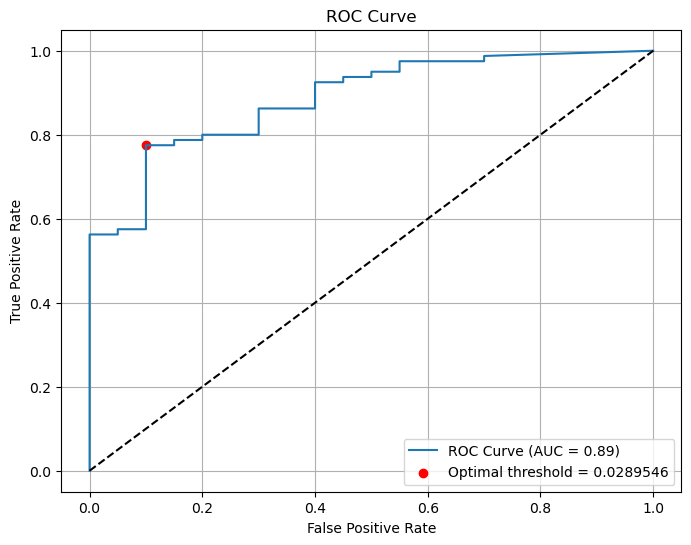


     - AUC: 88.62%
    - Optimal Threshold: 0.0289546
    - F1 Score: 0.86
    - CONFUSION MATRIX:
 [[18  2]
 [18 62]] 



    inference all anomaly test: 100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.14it/s]


    inference no anomaly test: 100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 22.16it/s]



- OK - Evaluating model (13.76 s)

Dataset               F1 Score
------------------------------
Anonaly lvl 1 test        1.00
Anonaly lvl 2 test        0.75
Anonaly lvl 3 test        0.67

Anomaly all test          0.86

No Anomaly Test           0.95

All test                  0.86


In [5]:
# STEPS = 5000, MODEL TYPE = SMALL, WEIGHT = none
model3 = EfficientAD({**config, "train_steps": 5000, "model_type": "small", "weight_path":""})
model3.create_model()
model3.display_eval_result()

In [6]:
# STEPS = 10000, MODEL TYPE = SMALL, WEIGHT = none
model4 = EfficientAD({**config, "train_steps": 10000, "model_type": "small", "weight_path":""})
model4.create_model()
model4.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.22 ms)

- Setting datasets path
     Dataset paths: dict_keys(['anomaly_lvl_1_test_paths', 'anomaly_lvl_2_test_paths', 'anomaly_lvl_3_test_paths', 'no_anomaly_test_paths', 'all_anomaly_test_paths', 'train_paths', 'test_paths', 'val_paths'])
- OK - Setting datasets path (4.31 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_10000_small
- OK - Setting config (3.99 ms)

- Prepare teacher, student & autoencoder
     No weight to load
     Training
- OK - Prepare teacher, student & autoencoder (61.42 ms)

- Normalizing teacher


    Computing std of features: 100%|██████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 50.81it/s]


- OK - Normalizing teacher (2.83 s)

- Train


       Current loss: 23.5000  :   0%|                                                                                 | 1/10000 [00:01<4:30:22,  1.62s/it]

F1 Validation 0.6451612903225806


       Current loss: 31.6716  :   0%|▍                                                                                 | 49/10000 [00:07<25:23,  6.53it/s]


KeyboardInterrupt: 

---

- Setting seed to 42
- OK - Setting seed to 42 (0.50 ms)

- Setting datasets path
     Dataset paths: dict_keys(['anomaly_lvl_1_test_paths', 'anomaly_lvl_2_test_paths', 'anomaly_lvl_3_test_paths', 'no_anomaly_test_paths', 'all_anomaly_test_paths', 'train_paths', 'test_paths', 'val_paths'])
- OK - Setting datasets path (3.57 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_20_medium
- OK - Setting config (11.83 ms)

- Prepare teacher, student & autoencoder
     No weight to load
     Training
- OK - Prepare teacher, student & autoencoder (180.60 ms)

- Normalizing teacher


    Computing std of features: 100%|██████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:03<00:00, 21.85it/s]


- OK - Normalizing teacher (6.59 s)

- Train


       Current loss: 91.8934  :   5%|████▎                                                                                 | 1/20 [00:03<01:07,  3.53s/it]

F1 Validation 0.5517241379310345


       Current loss: 59.0334  : 100%|█████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:09<00:00,  2.06it/s]


- OK - Train (9.72 s)

- Saving models to ../output/cookies_3_steps_20_medium/all_models.pth
- OK - Saving models (197.52 ms)

- Saving map normalization to ../output/cookies_3_steps_20_medium/map_normalization.pth


     Map normalisation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:02<00:00, 10.38it/s]


- OK - Saving map normalization (2794.26 ms)

- Evaluating model


     inference test: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.19it/s]


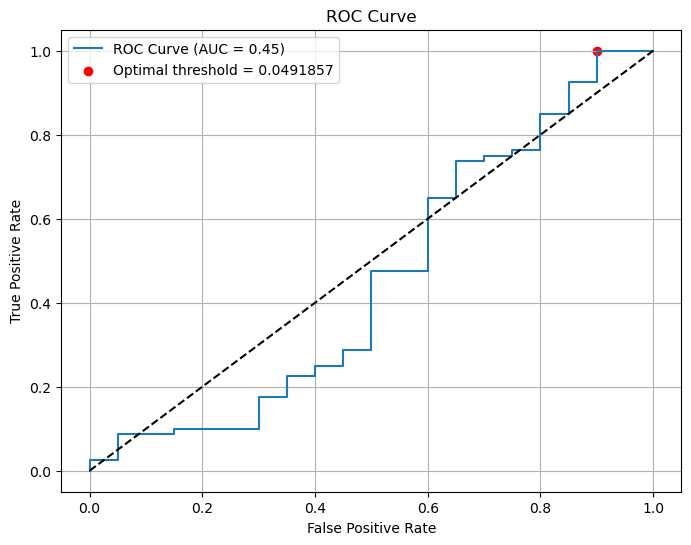


     - AUC: 45.31%
    - Optimal Threshold: 0.0491857
    - F1 Score: 0.90
    - CONFUSION MATRIX:
 [[ 2 18]
 [ 0 80]] 



    inference all anomaly test: 100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.17it/s]


    inference no anomaly test: 100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  9.17it/s]



- OK - Evaluating model (32.92 s)

Dataset               F1 Score
------------------------------
Anonaly lvl 1 test        1.00
Anonaly lvl 2 test        1.00
Anonaly lvl 3 test        1.00

Anomaly all test          0.99

No Anomaly Test           0.18

All test                  0.90


In [7]:
# STEPS = 20, MODEL TYPE = MEDIUM, WEIGHT = none
model6 = EfficientAD({**config, "train_steps": 20, "model_type": "medium", "weight_path":""})
model6.create_model()
model6.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.26 ms)

- Setting datasets path
     Dataset paths: dict_keys(['anomaly_lvl_1_test_paths', 'anomaly_lvl_2_test_paths', 'anomaly_lvl_3_test_paths', 'no_anomaly_test_paths', 'all_anomaly_test_paths', 'train_paths', 'test_paths', 'val_paths'])
- OK - Setting datasets path (4.93 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_500_medium
- OK - Setting config (10.06 ms)

- Prepare teacher, student & autoencoder
     No weight to load
     Training
- OK - Prepare teacher, student & autoencoder (164.97 ms)

- Normalizing teacher


    Computing std of features: 100%|██████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:03<00:00, 21.71it/s]


- OK - Normalizing teacher (6.65 s)

- Train


       Current loss: 91.8934  :   0%|▏                                                                                    | 1/500 [00:03<29:39,  3.57s/it]

F1 Validation 0.5517241379310345


       Current loss: 10.9337  :  20%|████████████████▊                                                                  | 101/500 [00:39<08:22,  1.26s/it]

F1 Validation 0.8108108108108109


       Current loss: 7.4086  :  40%|█████████████████████████████████▊                                                  | 201/500 [01:15<06:17,  1.26s/it]

F1 Validation 0.75


       Current loss: 7.4997  :  60%|██████████████████████████████████████████████████▌                                 | 301/500 [01:52<04:11,  1.26s/it]

F1 Validation 0.7272727272727273


       Current loss: 11.0552  :  80%|██████████████████████████████████████████████████████████████████▌                | 401/500 [02:28<02:05,  1.27s/it]

F1 Validation 0.8333333333333334


       Current loss: 3.2578  : 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500 [03:01<00:00,  2.76it/s]


- OK - Train (181.31 s)

- Saving models to ../output/cookies_3_steps_500_medium/all_models.pth
- OK - Saving models (206.78 ms)

- Saving map normalization to ../output/cookies_3_steps_500_medium/map_normalization.pth


     Map normalisation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:02<00:00, 10.35it/s]


- OK - Saving map normalization (2804.30 ms)

- Evaluating model


     inference test: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.11it/s]


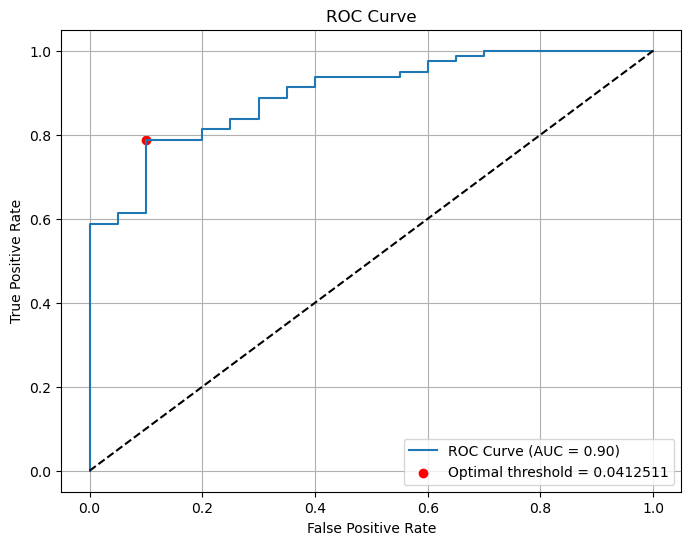


     - AUC: 89.75%
    - Optimal Threshold: 0.0412511
    - F1 Score: 0.87
    - CONFUSION MATRIX:
 [[18  2]
 [17 63]] 



    inference all anomaly test: 100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.16it/s]


    inference no anomaly test: 100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  9.17it/s]



- OK - Evaluating model (33.06 s)

Dataset               F1 Score
------------------------------
Anonaly lvl 1 test        0.99
Anonaly lvl 2 test        0.82
Anonaly lvl 3 test        0.67

Anomaly all test          0.88

No Anomaly Test           0.95

All test                  0.87


In [8]:
# STEPS = 500, MODEL TYPE = MEDIUM, WEIGHT = none
model7 = EfficientAD({**config, "train_steps": 500, "model_type": "medium", "weight_path":""})
model7.create_model()
model7.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.27 ms)

- Setting datasets path
     Dataset paths: dict_keys(['anomaly_lvl_1_test_paths', 'anomaly_lvl_2_test_paths', 'anomaly_lvl_3_test_paths', 'no_anomaly_test_paths', 'all_anomaly_test_paths', 'train_paths', 'test_paths', 'val_paths'])
- OK - Setting datasets path (4.74 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_5000_medium
- OK - Setting config (0.12 ms)

- Prepare teacher, student & autoencoder
     No weight to load
     Training
- OK - Prepare teacher, student & autoencoder (160.22 ms)

- Normalizing teacher


    Computing std of features: 100%|██████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:03<00:00, 21.52it/s]


- OK - Normalizing teacher (6.69 s)

- Train


       Current loss: 91.8934  :   0%|                                                                                  | 1/5000 [00:03<4:58:50,  3.59s/it]

F1 Validation 0.5517241379310345


       Current loss: 10.9421  :   2%|█▌                                                                              | 101/5000 [00:39<1:43:11,  1.26s/it]

F1 Validation 0.8108108108108109


       Current loss: 7.5011  :   4%|███▎                                                                             | 201/5000 [01:16<1:41:18,  1.27s/it]

F1 Validation 0.75


       Current loss: 7.5772  :   6%|████▉                                                                            | 301/5000 [01:52<1:39:31,  1.27s/it]

F1 Validation 0.7647058823529411


       Current loss: 11.0889  :   8%|██████▍                                                                         | 401/5000 [02:28<1:37:15,  1.27s/it]

F1 Validation 0.8333333333333334


       Current loss: 6.0276  :  10%|████████                                                                         | 501/5000 [03:05<1:34:52,  1.27s/it]

F1 Validation 0.9


       Current loss: 10.1115  :  12%|█████████▌                                                                      | 601/5000 [03:41<1:33:16,  1.27s/it]

F1 Validation 0.7647058823529411


       Current loss: 3.4369  :  14%|███████████▎                                                                     | 701/5000 [04:18<1:31:02,  1.27s/it]

F1 Validation 0.8


       Current loss: 5.4180  :  16%|████████████▉                                                                    | 801/5000 [04:54<1:28:50,  1.27s/it]

F1 Validation 0.8333333333333334


       Current loss: 4.4896  :  18%|██████████████▌                                                                  | 901/5000 [05:31<1:26:41,  1.27s/it]

F1 Validation 0.8717948717948718


       Current loss: 2.0717  :  20%|████████████████                                                                | 1001/5000 [06:07<1:24:38,  1.27s/it]

F1 Validation 0.7647058823529411


       Current loss: 2.3179  :  22%|█████████████████▌                                                              | 1101/5000 [06:43<1:22:30,  1.27s/it]

F1 Validation 0.7096774193548387


       Current loss: 2.6633  :  24%|███████████████████▏                                                            | 1201/5000 [07:20<1:20:23,  1.27s/it]

F1 Validation 0.8


       Current loss: 2.8343  :  26%|████████████████████▊                                                           | 1301/5000 [07:56<1:19:08,  1.28s/it]

F1 Validation 0.7272727272727273


       Current loss: 3.3417  :  28%|██████████████████████▍                                                         | 1401/5000 [08:33<1:16:12,  1.27s/it]

F1 Validation 0.9047619047619048


       Current loss: 2.0842  :  30%|████████████████████████                                                        | 1501/5000 [09:09<1:14:08,  1.27s/it]

F1 Validation 0.7096774193548387


       Current loss: 3.1276  :  32%|█████████████████████████▌                                                      | 1601/5000 [09:46<1:11:43,  1.27s/it]

F1 Validation 0.8


       Current loss: 2.1818  :  34%|███████████████████████████▏                                                    | 1701/5000 [10:22<1:09:46,  1.27s/it]

F1 Validation 0.8780487804878049


       Current loss: 2.2747  :  36%|████████████████████████████▊                                                   | 1801/5000 [10:59<1:10:19,  1.32s/it]

F1 Validation 0.8717948717948718


       Current loss: 3.8479  :  38%|██████████████████████████████▍                                                 | 1901/5000 [11:35<1:05:27,  1.27s/it]

F1 Validation 0.8333333333333334


       Current loss: 7.6651  :  40%|████████████████████████████████                                                | 2001/5000 [12:12<1:03:31,  1.27s/it]

F1 Validation 0.9047619047619048


       Current loss: 2.1156  :  42%|█████████████████████████████████▌                                              | 2101/5000 [12:48<1:01:26,  1.27s/it]

F1 Validation 0.8


       Current loss: 1.9430  :  44%|████████████████████████████████████                                              | 2201/5000 [13:25<59:14,  1.27s/it]

F1 Validation 0.8717948717948718


       Current loss: 1.5055  :  46%|█████████████████████████████████████▋                                            | 2301/5000 [14:01<57:02,  1.27s/it]

F1 Validation 0.926829268292683


       Current loss: 2.7284  :  48%|███████████████████████████████████████▍                                          | 2401/5000 [14:38<55:06,  1.27s/it]

F1 Validation 0.9047619047619048


       Current loss: 3.6469  :  50%|█████████████████████████████████████████                                         | 2501/5000 [15:14<53:01,  1.27s/it]

F1 Validation 0.926829268292683


       Current loss: 3.2708  :  52%|██████████████████████████████████████████▋                                       | 2601/5000 [15:51<51:03,  1.28s/it]

F1 Validation 0.9


       Current loss: 3.8423  :  54%|████████████████████████████████████████████▎                                     | 2701/5000 [16:27<48:37,  1.27s/it]

F1 Validation 0.7272727272727273


       Current loss: 1.4583  :  56%|█████████████████████████████████████████████▉                                    | 2801/5000 [17:04<46:40,  1.27s/it]

F1 Validation 0.7777777777777778


       Current loss: 2.9438  :  58%|███████████████████████████████████████████████▌                                  | 2901/5000 [17:41<44:36,  1.27s/it]

F1 Validation 0.7777777777777778


       Current loss: 1.4852  :  60%|█████████████████████████████████████████████████▏                                | 3001/5000 [18:17<42:19,  1.27s/it]

F1 Validation 0.8333333333333334


       Current loss: 1.7922  :  62%|██████████████████████████████████████████████████▊                               | 3101/5000 [18:54<40:32,  1.28s/it]

F1 Validation 0.8


       Current loss: 1.9035  :  64%|████████████████████████████████████████████████████▍                             | 3201/5000 [19:30<38:03,  1.27s/it]

F1 Validation 0.8


       Current loss: 0.9275  :  66%|██████████████████████████████████████████████████████▏                           | 3301/5000 [20:06<35:54,  1.27s/it]

F1 Validation 0.6666666666666666


       Current loss: 1.6014  :  68%|███████████████████████████████████████████████████████▊                          | 3401/5000 [20:43<33:54,  1.27s/it]

F1 Validation 0.7272727272727273


       Current loss: 1.8778  :  70%|█████████████████████████████████████████████████████████▍                        | 3501/5000 [21:20<31:48,  1.27s/it]

F1 Validation 0.7272727272727273


       Current loss: 4.0031  :  72%|███████████████████████████████████████████████████████████                       | 3601/5000 [21:56<30:53,  1.33s/it]

F1 Validation 0.8333333333333334


       Current loss: 1.2849  :  74%|████████████████████████████████████████████████████████████▋                     | 3701/5000 [22:33<27:28,  1.27s/it]

F1 Validation 0.8


       Current loss: 1.8299  :  76%|██████████████████████████████████████████████████████████████▎                   | 3800/5000 [23:09<07:18,  2.73it/s]


F1 Validation 0.8
Early stopping at iteration 3801 because validation F1 did not improve.
- OK - Train (1389.47 s)

- Saving models to ../output/cookies_3_steps_5000_medium/all_models.pth
- OK - Saving models (148.95 ms)

- Saving map normalization to ../output/cookies_3_steps_5000_medium/map_normalization.pth


     Map normalisation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:02<00:00, 10.29it/s]


- OK - Saving map normalization (2820.04 ms)

- Evaluating model


     inference test: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.13it/s]


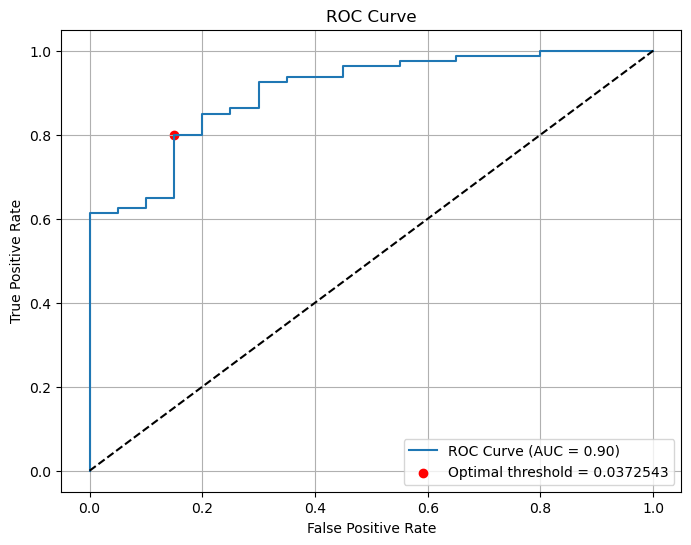


     - AUC: 90.19%
    - Optimal Threshold: 0.0372543
    - F1 Score: 0.87
    - CONFUSION MATRIX:
 [[17  3]
 [16 64]] 



    inference all anomaly test: 100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.11it/s]


    inference no anomaly test: 100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  9.11it/s]



- OK - Evaluating model (33.13 s)

Dataset               F1 Score
------------------------------
Anonaly lvl 1 test        1.00
Anonaly lvl 2 test        0.79
Anonaly lvl 3 test        0.71

Anomaly all test          0.88

No Anomaly Test           0.92

All test                  0.87


In [9]:
# STEPS = 5000, MODEL TYPE = MEDIUM, WEIGHT = none
model8 = EfficientAD({**config, "train_steps": 5000, "model_type": "medium", "weight_path":""})
model8.create_model()
model8.display_eval_result()

In [10]:
# STEPS = 10000, MODEL TYPE = MEDIUM, WEIGHT = none
model9 = EfficientAD({**config, "train_steps": 10000, "model_type": "medium", "weight_path":""})
model9.create_model()
model9.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.50 ms)

- Setting datasets path
     Dataset paths: dict_keys(['anomaly_lvl_1_test_paths', 'anomaly_lvl_2_test_paths', 'anomaly_lvl_3_test_paths', 'no_anomaly_test_paths', 'all_anomaly_test_paths', 'train_paths', 'test_paths', 'val_paths'])
- OK - Setting datasets path (4.48 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_10000_medium
- OK - Setting config (0.11 ms)

- Prepare teacher, student & autoencoder
     No weight to load
     Training
- OK - Prepare teacher, student & autoencoder (160.58 ms)

- Normalizing teacher


    Computing std of features:   0%|                                                                                               | 0/72 [00:00<?, ?it/s]


KeyboardInterrupt: 

KeyboardInterrupt: 

---

- Setting seed to 42
- OK - Setting seed to 42 (0.42 ms)

- Setting datasets path
     Dataset paths: dict_keys(['anomaly_lvl_1_test_paths', 'anomaly_lvl_2_test_paths', 'anomaly_lvl_3_test_paths', 'no_anomaly_test_paths', 'all_anomaly_test_paths', 'train_paths', 'test_paths', 'val_paths'])
- OK - Setting datasets path (4.70 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_20_small_weighted
- OK - Setting config (0.21 ms)

- Prepare teacher, student & autoencoder
     Loading weight ../weights/teacher_small.pth
     Training
- OK - Prepare teacher, student & autoencoder (80.52 ms)

- Normalizing teacher


    Computing std of features: 100%|██████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 49.47it/s]


- OK - Normalizing teacher (2.90 s)

- Train


       Current loss: 39.9363  :   5%|████▎                                                                                 | 1/20 [00:01<00:30,  1.61s/it]

F1 Validation 0.9230769230769231


       Current loss: 60.6087  : 100%|█████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  5.16it/s]


- OK - Train (3.88 s)

- Saving models to ../output/cookies_3_steps_20_small_weighted/all_models.pth
- OK - Saving models (81.50 ms)

- Saving map normalization to ../output/cookies_3_steps_20_small_weighted/map_normalization.pth


     Map normalisation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 28.43it/s]


- OK - Saving map normalization (1018.72 ms)

- Evaluating model


     inference test: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.01it/s]


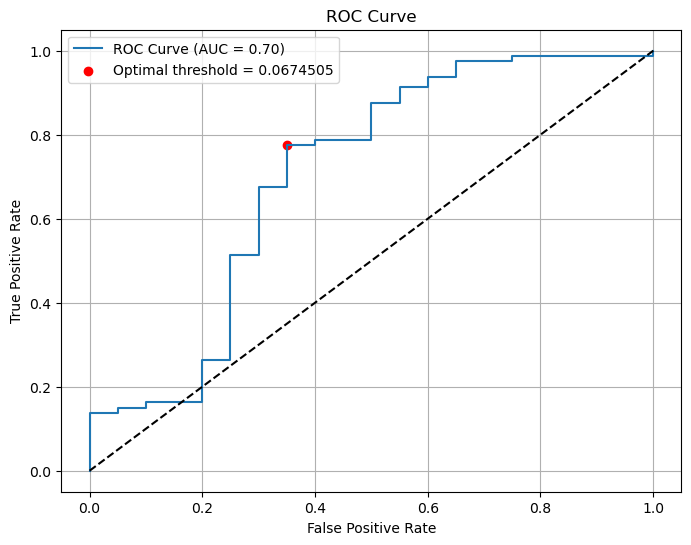


     - AUC: 70.12%
    - Optimal Threshold: 0.0674505
    - F1 Score: 0.83
    - CONFUSION MATRIX:
 [[13  7]
 [18 62]] 



    inference all anomaly test: 100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.13it/s]


    inference no anomaly test: 100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 22.14it/s]



- OK - Evaluating model (13.78 s)

Dataset               F1 Score
------------------------------
Anonaly lvl 1 test        0.92
Anonaly lvl 2 test        0.86
Anonaly lvl 3 test        0.79

Anomaly all test          0.88

No Anomaly Test           0.79

All test                  0.83


In [13]:
# STEPS = 20, MODEL TYPE = SMALL, WEIGHT = on
model11 = EfficientAD({**config, "train_steps": 20, "model_type": "small", "weight_path":"../weights/teacher_small.pth"})
model11.create_model()
model11.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.78 ms)

- Setting datasets path
     Dataset paths: dict_keys(['anomaly_lvl_1_test_paths', 'anomaly_lvl_2_test_paths', 'anomaly_lvl_3_test_paths', 'no_anomaly_test_paths', 'all_anomaly_test_paths', 'train_paths', 'test_paths', 'val_paths'])
- OK - Setting datasets path (3.94 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_500_small_weighted
- OK - Setting config (0.11 ms)

- Prepare teacher, student & autoencoder
     Loading weight ../weights/teacher_small.pth
     Training
- OK - Prepare teacher, student & autoencoder (74.82 ms)

- Normalizing teacher


    Computing std of features: 100%|██████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 49.40it/s]


- OK - Normalizing teacher (2.90 s)

- Train


       Current loss: 39.9363  :   0%|▏                                                                                    | 1/500 [00:01<13:26,  1.62s/it]

F1 Validation 0.9230769230769231


       Current loss: 20.2424  :  20%|████████████████▊                                                                  | 101/500 [00:15<03:21,  1.98it/s]

F1 Validation 0.918918918918919


       Current loss: 12.9697  :  40%|█████████████████████████████████▎                                                 | 201/500 [00:29<02:30,  1.98it/s]

F1 Validation 0.918918918918919


       Current loss: 11.6319  :  60%|█████████████████████████████████████████████████▉                                 | 301/500 [00:43<01:40,  1.97it/s]

F1 Validation 0.975609756097561


       Current loss: 9.2919  :  80%|███████████████████████████████████████████████████████████████████▎                | 401/500 [00:56<00:50,  1.96it/s]

F1 Validation 0.918918918918919


       Current loss: 8.1361  : 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:09<00:00,  7.22it/s]


- OK - Train (69.28 s)

- Saving models to ../output/cookies_3_steps_500_small_weighted/all_models.pth
- OK - Saving models (79.04 ms)

- Saving map normalization to ../output/cookies_3_steps_500_small_weighted/map_normalization.pth


     Map normalisation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 28.24it/s]


- OK - Saving map normalization (1025.01 ms)

- Evaluating model


     inference test: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 21.85it/s]


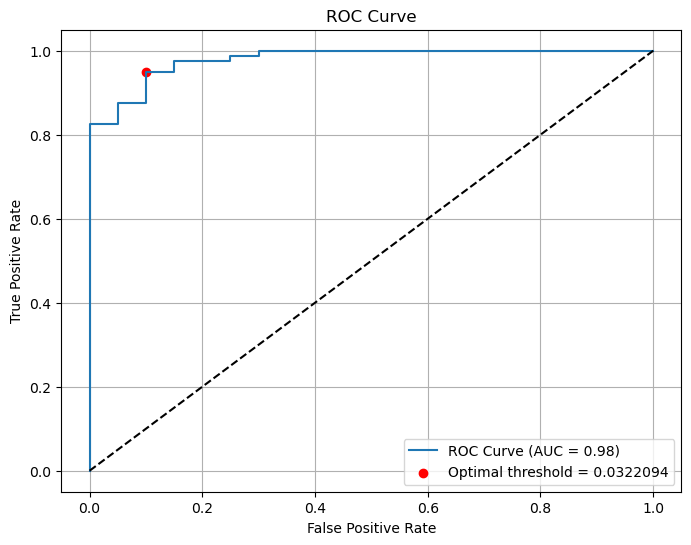


     - AUC: 97.94%
    - Optimal Threshold: 0.0322094
    - F1 Score: 0.96
    - CONFUSION MATRIX:
 [[18  2]
 [ 4 76]] 



    inference all anomaly test: 100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.06it/s]


    inference no anomaly test: 100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 22.12it/s]



- OK - Evaluating model (13.87 s)

Dataset               F1 Score
------------------------------
Anonaly lvl 1 test        1.00
Anonaly lvl 2 test        1.00
Anonaly lvl 3 test        0.89

Anomaly all test          0.98

No Anomaly Test           0.95

All test                  0.96


In [14]:
# STEPS = 500, MODEL TYPE = SMALL, WEIGHT = on
model12 = EfficientAD({**config, "train_steps": 500, "model_type": "small", "weight_path":"../weights/teacher_small.pth"})
model12.create_model()
model12.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.27 ms)

- Setting datasets path
     Dataset paths: dict_keys(['anomaly_lvl_1_test_paths', 'anomaly_lvl_2_test_paths', 'anomaly_lvl_3_test_paths', 'no_anomaly_test_paths', 'all_anomaly_test_paths', 'train_paths', 'test_paths', 'val_paths'])
- OK - Setting datasets path (4.67 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_5000_small_weighted
- OK - Setting config (0.14 ms)

- Prepare teacher, student & autoencoder
     Loading weight ../weights/teacher_small.pth
     Training
- OK - Prepare teacher, student & autoencoder (74.20 ms)

- Normalizing teacher


    Computing std of features: 100%|██████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 49.76it/s]


- OK - Normalizing teacher (2.86 s)

- Train


       Current loss: 39.9363  :   0%|                                                                                  | 1/5000 [00:01<2:13:48,  1.61s/it]

F1 Validation 0.9230769230769231


       Current loss: 20.2371  :   2%|█▋                                                                                | 101/5000 [00:15<41:17,  1.98it/s]

F1 Validation 0.918918918918919


       Current loss: 12.9873  :   4%|███▎                                                                              | 201/5000 [00:29<40:32,  1.97it/s]

F1 Validation 0.918918918918919


       Current loss: 11.6855  :   6%|████▉                                                                             | 301/5000 [00:43<39:49,  1.97it/s]

F1 Validation 0.975609756097561


       Current loss: 9.3164  :   8%|██████▋                                                                            | 401/5000 [00:57<38:47,  1.98it/s]

F1 Validation 0.918918918918919


       Current loss: 10.1041  :  10%|████████▏                                                                         | 501/5000 [01:11<38:14,  1.96it/s]

F1 Validation 0.9743589743589743


       Current loss: 8.1916  :  12%|█████████▉                                                                         | 601/5000 [01:25<37:40,  1.95it/s]

F1 Validation 0.9743589743589743


       Current loss: 7.4264  :  14%|███████████▋                                                                       | 701/5000 [01:39<36:17,  1.97it/s]

F1 Validation 0.9473684210526315


       Current loss: 8.9889  :  16%|█████████████▎                                                                     | 801/5000 [01:53<36:03,  1.94it/s]

F1 Validation 0.9473684210526315


       Current loss: 7.6123  :  18%|██████████████▉                                                                    | 901/5000 [02:07<34:44,  1.97it/s]

F1 Validation 0.9473684210526315


       Current loss: 6.0918  :  20%|████████████████▍                                                                 | 1001/5000 [02:21<33:56,  1.96it/s]

F1 Validation 0.9743589743589743


       Current loss: 7.6462  :  22%|██████████████████                                                                | 1101/5000 [02:35<32:54,  1.97it/s]

F1 Validation 0.975609756097561


       Current loss: 7.4376  :  24%|███████████████████▋                                                              | 1201/5000 [02:49<32:13,  1.96it/s]

F1 Validation 0.975609756097561


       Current loss: 6.3026  :  26%|█████████████████████▎                                                            | 1301/5000 [03:03<32:17,  1.91it/s]

F1 Validation 0.975609756097561


       Current loss: 6.3493  :  28%|██████████████████████▉                                                           | 1401/5000 [03:17<30:47,  1.95it/s]

F1 Validation 0.9743589743589743


       Current loss: 6.6122  :  30%|████████████████████████▌                                                         | 1501/5000 [03:31<29:39,  1.97it/s]

F1 Validation 0.975609756097561


       Current loss: 13.8073  :  32%|█████████████████████████▉                                                       | 1601/5000 [03:45<29:10,  1.94it/s]

F1 Validation 0.9743589743589743


       Current loss: 6.6579  :  34%|███████████████████████████▉                                                      | 1701/5000 [03:59<28:15,  1.95it/s]

F1 Validation 1.0


       Current loss: 7.0115  :  36%|█████████████████████████████▌                                                    | 1801/5000 [04:13<31:47,  1.68it/s]

F1 Validation 1.0


       Current loss: 5.4137  :  38%|███████████████████████████████▏                                                  | 1901/5000 [04:27<26:20,  1.96it/s]

F1 Validation 0.975609756097561


       Current loss: 5.8775  :  40%|████████████████████████████████▊                                                 | 2001/5000 [04:41<25:23,  1.97it/s]

F1 Validation 1.0


       Current loss: 5.6189  :  42%|██████████████████████████████████▍                                               | 2101/5000 [04:55<24:29,  1.97it/s]

F1 Validation 0.975609756097561


       Current loss: 6.2148  :  44%|████████████████████████████████████                                              | 2201/5000 [05:09<24:07,  1.93it/s]

F1 Validation 1.0


       Current loss: 6.0581  :  46%|█████████████████████████████████████▋                                            | 2301/5000 [05:23<22:56,  1.96it/s]

F1 Validation 1.0


       Current loss: 6.0633  :  48%|███████████████████████████████████████▍                                          | 2401/5000 [05:37<22:26,  1.93it/s]

F1 Validation 0.9473684210526315


       Current loss: 5.7604  :  50%|█████████████████████████████████████████                                         | 2501/5000 [05:51<21:04,  1.98it/s]

F1 Validation 1.0


       Current loss: 6.0447  :  52%|██████████████████████████████████████████▋                                       | 2601/5000 [06:05<20:35,  1.94it/s]

F1 Validation 1.0


       Current loss: 5.9753  :  54%|████████████████████████████████████████████▎                                     | 2701/5000 [06:19<19:29,  1.97it/s]

F1 Validation 1.0


       Current loss: 4.8369  :  56%|█████████████████████████████████████████████▉                                    | 2801/5000 [06:33<18:54,  1.94it/s]

F1 Validation 1.0


       Current loss: 5.9145  :  58%|███████████████████████████████████████████████▌                                  | 2901/5000 [06:47<17:48,  1.96it/s]

F1 Validation 1.0


       Current loss: 5.3674  :  60%|█████████████████████████████████████████████████▏                                | 3001/5000 [07:01<17:11,  1.94it/s]

F1 Validation 1.0


       Current loss: 5.0132  :  62%|██████████████████████████████████████████████████▊                               | 3101/5000 [07:15<16:40,  1.90it/s]

F1 Validation 1.0


       Current loss: 4.9510  :  64%|████████████████████████████████████████████████████▍                             | 3200/5000 [07:29<04:12,  7.12it/s]


F1 Validation 1.0
Early stopping at iteration 3201 because validation F1 did not improve.
- OK - Train (449.25 s)

- Saving models to ../output/cookies_3_steps_5000_small_weighted/all_models.pth
- OK - Saving models (61.16 ms)

- Saving map normalization to ../output/cookies_3_steps_5000_small_weighted/map_normalization.pth


     Map normalisation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 28.64it/s]


- OK - Saving map normalization (1011.50 ms)

- Evaluating model


     inference test: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.17it/s]


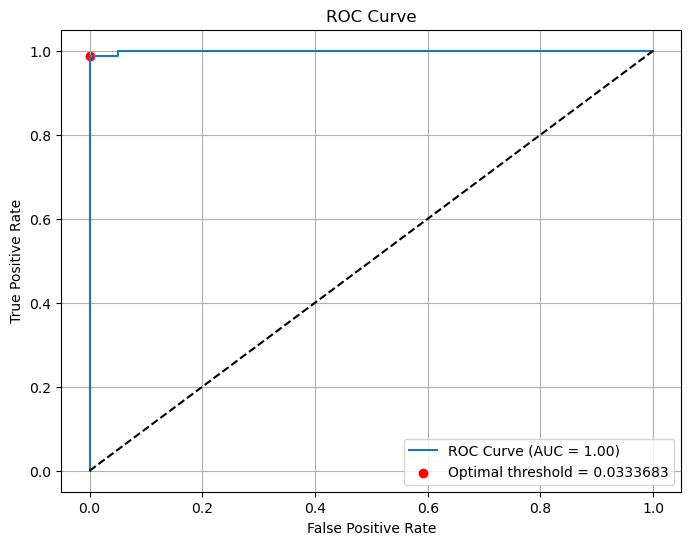


     - AUC: 99.94%
    - Optimal Threshold: 0.0333683
    - F1 Score: 0.99
    - CONFUSION MATRIX:
 [[20  0]
 [ 1 79]] 



    inference all anomaly test: 100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 21.94it/s]


    inference no anomaly test: 100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 21.96it/s]



- OK - Evaluating model (13.85 s)

Dataset               F1 Score
------------------------------
Anonaly lvl 1 test        1.00
Anonaly lvl 2 test        1.00
Anonaly lvl 3 test        0.97

Anomaly all test          0.99

No Anomaly Test           1.00

All test                  0.99


In [15]:
# STEPS = 5000, MODEL TYPE = SMALL, WEIGHT = on
model13 = EfficientAD({**config, "train_steps": 5000, "model_type": "small", "weight_path":"../weights/teacher_small.pth"})
model13.create_model()
model13.display_eval_result()

In [ ]:
# STEPS = 10000, MODEL TYPE = SMALL, WEIGHT = on
model14 = EfficientAD({**config, "train_steps": 10000, "model_type": "small", "weight_path":"../weights/teacher_small.pth"})
model14.create_model()
model14.display_eval_result()

---

- Setting seed to 42
- OK - Setting seed to 42 (0.28 ms)

- Setting datasets path
     Dataset paths: dict_keys(['anomaly_lvl_1_test_paths', 'anomaly_lvl_2_test_paths', 'anomaly_lvl_3_test_paths', 'no_anomaly_test_paths', 'all_anomaly_test_paths', 'train_paths', 'test_paths', 'val_paths'])
- OK - Setting datasets path (4.62 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_20_medium_weighted
- OK - Setting config (0.11 ms)

- Prepare teacher, student & autoencoder
     Loading weight ../weights/teacher_medium.pth
     Training
- OK - Prepare teacher, student & autoencoder (211.90 ms)

- Normalizing teacher


    Computing std of features: 100%|██████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:03<00:00, 21.53it/s]


- OK - Normalizing teacher (6.69 s)

- Train


       Current loss: 68.6309  :   5%|████▎                                                                                 | 1/20 [00:03<01:07,  3.55s/it]

F1 Validation 0.95


       Current loss: 42.8470  : 100%|█████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:09<00:00,  2.05it/s]


- OK - Train (9.74 s)

- Saving models to ../output/cookies_3_steps_20_medium_weighted/all_models.pth
- OK - Saving models (204.05 ms)

- Saving map normalization to ../output/cookies_3_steps_20_medium_weighted/map_normalization.pth


     Map normalisation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:02<00:00, 10.37it/s]


- OK - Saving map normalization (2796.52 ms)

- Evaluating model


     inference test: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.14it/s]


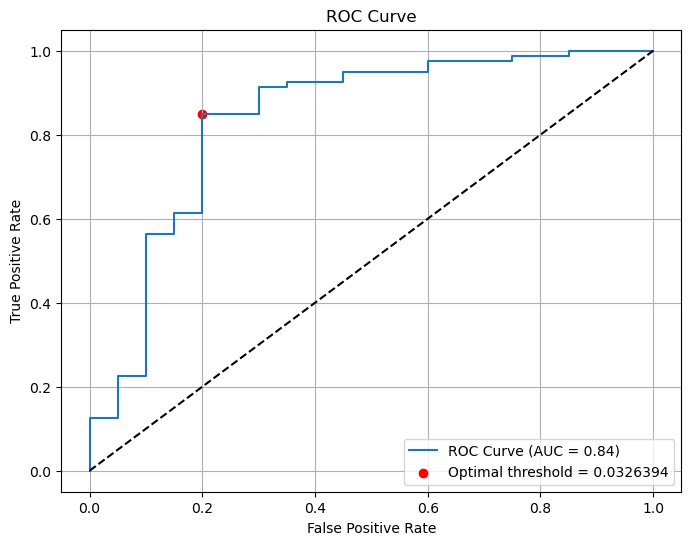


     - AUC: 83.69%
    - Optimal Threshold: 0.0326394
    - F1 Score: 0.89
    - CONFUSION MATRIX:
 [[16  4]
 [12 68]] 



    inference all anomaly test: 100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.14it/s]


    inference no anomaly test: 100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  9.12it/s]



- OK - Evaluating model (33.04 s)

Dataset               F1 Score
------------------------------
Anonaly lvl 1 test        0.96
Anonaly lvl 2 test        1.00
Anonaly lvl 3 test        0.71

Anomaly all test          0.92

No Anomaly Test           0.89

All test                  0.89


In [16]:
# STEPS = 20, MODEL TYPE = MEDIUM, WEIGHT = on
model16 = EfficientAD({**config, "train_steps": 20, "model_type": "medium", "weight_path":"../weights/teacher_medium.pth"})
model16.create_model()
model16.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.45 ms)

- Setting datasets path
     Dataset paths: dict_keys(['anomaly_lvl_1_test_paths', 'anomaly_lvl_2_test_paths', 'anomaly_lvl_3_test_paths', 'no_anomaly_test_paths', 'all_anomaly_test_paths', 'train_paths', 'test_paths', 'val_paths'])
- OK - Setting datasets path (4.02 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_500_medium_weighted
- OK - Setting config (10.11 ms)

- Prepare teacher, student & autoencoder
     Loading weight ../weights/teacher_medium.pth
     Training
- OK - Prepare teacher, student & autoencoder (176.04 ms)

- Normalizing teacher


    Computing std of features: 100%|██████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:03<00:00, 21.70it/s]


- OK - Normalizing teacher (6.59 s)

- Train


       Current loss: 68.6309  :   0%|▏                                                                                    | 1/500 [00:03<29:31,  3.55s/it]

F1 Validation 0.95


       Current loss: 20.9917  :  20%|████████████████▊                                                                  | 101/500 [00:39<08:24,  1.26s/it]

F1 Validation 0.926829268292683


       Current loss: 14.8370  :  40%|█████████████████████████████████▎                                                 | 201/500 [01:15<06:18,  1.27s/it]

F1 Validation 0.8571428571428571


       Current loss: 15.0840  :  60%|█████████████████████████████████████████████████▉                                 | 301/500 [01:52<04:12,  1.27s/it]

F1 Validation 0.918918918918919


       Current loss: 12.1250  :  80%|██████████████████████████████████████████████████████████████████▌                | 401/500 [02:29<02:06,  1.27s/it]

F1 Validation 0.918918918918919


       Current loss: 9.2769  : 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500 [03:02<00:00,  2.74it/s]


- OK - Train (182.58 s)

- Saving models to ../output/cookies_3_steps_500_medium_weighted/all_models.pth
- OK - Saving models (210.89 ms)

- Saving map normalization to ../output/cookies_3_steps_500_medium_weighted/map_normalization.pth


     Map normalisation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:02<00:00, 10.20it/s]


- OK - Saving map normalization (2843.68 ms)

- Evaluating model


     inference test: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  9.09it/s]


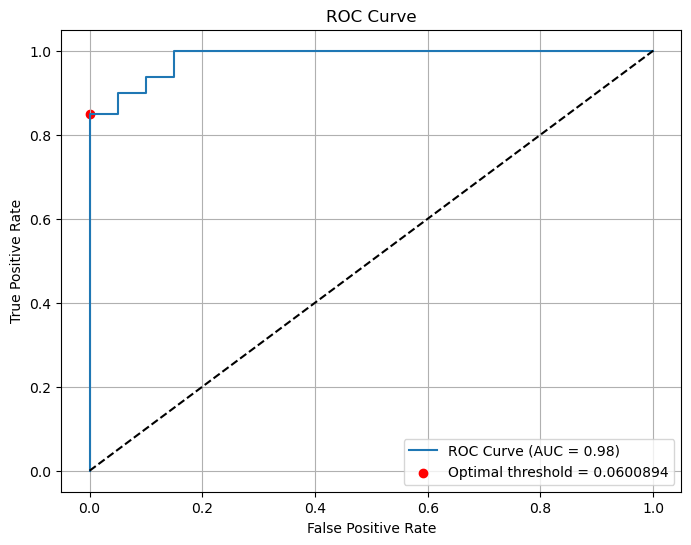


     - AUC: 98.44%
    - Optimal Threshold: 0.0600894
    - F1 Score: 0.92
    - CONFUSION MATRIX:
 [[20  0]
 [12 68]] 



    inference all anomaly test: 100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  9.09it/s]


    inference no anomaly test: 100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  9.10it/s]



- OK - Evaluating model (33.23 s)

Dataset               F1 Score
------------------------------
Anonaly lvl 1 test        1.00
Anonaly lvl 2 test        0.95
Anonaly lvl 3 test        0.67

Anomaly all test          0.91

No Anomaly Test           1.00

All test                  0.92


In [19]:
# STEPS = 500, MODEL TYPE = MEDIUM, WEIGHT = on
model17 = EfficientAD({**config, "train_steps": 500, "model_type": "medium", "weight_path":"../weights/teacher_medium.pth"})
model17.create_model()
model17.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.55 ms)

- Setting datasets path
     Dataset paths: dict_keys(['anomaly_lvl_1_test_paths', 'anomaly_lvl_2_test_paths', 'anomaly_lvl_3_test_paths', 'no_anomaly_test_paths', 'all_anomaly_test_paths', 'train_paths', 'test_paths', 'val_paths'])
- OK - Setting datasets path (4.36 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_5000_medium_weighted
- OK - Setting config (0.12 ms)

- Prepare teacher, student & autoencoder
     Loading weight ../weights/teacher_medium.pth
     Training
- OK - Prepare teacher, student & autoencoder (190.37 ms)

- Normalizing teacher


    Computing std of features: 100%|██████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:03<00:00, 21.49it/s]


- OK - Normalizing teacher (6.73 s)

- Train


       Current loss: 68.6309  :   0%|                                                                                  | 1/5000 [00:03<4:59:09,  3.59s/it]

F1 Validation 0.95


       Current loss: 20.9237  :   2%|█▌                                                                              | 101/5000 [00:40<1:43:55,  1.27s/it]

F1 Validation 0.926829268292683


       Current loss: 14.7919  :   4%|███▏                                                                            | 201/5000 [01:16<1:41:43,  1.27s/it]

F1 Validation 0.9230769230769231


       Current loss: 15.1827  :   6%|████▊                                                                           | 301/5000 [01:53<1:39:48,  1.27s/it]

F1 Validation 0.918918918918919


       Current loss: 12.6867  :   8%|██████▍                                                                         | 401/5000 [02:30<1:37:45,  1.28s/it]

F1 Validation 0.9473684210526315


       Current loss: 11.1644  :  10%|████████                                                                        | 501/5000 [03:06<1:35:23,  1.27s/it]

F1 Validation 0.9743589743589743


       Current loss: 11.8949  :  12%|█████████▌                                                                      | 601/5000 [03:43<1:33:37,  1.28s/it]

F1 Validation 0.975609756097561


       Current loss: 9.6371  :  14%|███████████▎                                                                     | 701/5000 [04:20<1:31:20,  1.27s/it]

F1 Validation 0.975609756097561


       Current loss: 11.0092  :  16%|████████████▊                                                                   | 801/5000 [04:57<1:29:30,  1.28s/it]

F1 Validation 0.975609756097561


       Current loss: 8.0689  :  18%|██████████████▌                                                                  | 901/5000 [05:34<1:27:04,  1.27s/it]

F1 Validation 0.9473684210526315


       Current loss: 7.4727  :  20%|████████████████                                                                | 1001/5000 [06:11<1:25:12,  1.28s/it]

F1 Validation 1.0


       Current loss: 7.5814  :  22%|█████████████████▌                                                              | 1101/5000 [06:48<1:22:49,  1.27s/it]

F1 Validation 1.0


       Current loss: 6.9276  :  24%|███████████████████▏                                                            | 1201/5000 [07:25<1:20:37,  1.27s/it]

F1 Validation 0.975609756097561


       Current loss: 7.7713  :  26%|████████████████████▊                                                           | 1301/5000 [08:02<1:19:24,  1.29s/it]

F1 Validation 0.9743589743589743


       Current loss: 8.5872  :  28%|██████████████████████▍                                                         | 1401/5000 [08:39<1:16:35,  1.28s/it]

F1 Validation 0.975609756097561


       Current loss: 6.7772  :  30%|████████████████████████                                                        | 1501/5000 [09:16<1:14:17,  1.27s/it]

F1 Validation 0.9743589743589743


       Current loss: 7.7838  :  32%|█████████████████████████▌                                                      | 1601/5000 [09:53<1:12:15,  1.28s/it]

F1 Validation 0.9473684210526315


       Current loss: 6.4460  :  34%|███████████████████████████▏                                                    | 1701/5000 [10:29<1:10:02,  1.27s/it]

F1 Validation 0.9743589743589743


       Current loss: 7.3359  :  36%|████████████████████████████▊                                                   | 1801/5000 [11:06<1:11:02,  1.33s/it]

F1 Validation 1.0


       Current loss: 10.7029  :  38%|██████████████████████████████                                                 | 1901/5000 [11:43<1:06:01,  1.28s/it]

F1 Validation 1.0


       Current loss: 10.7263  :  40%|███████████████████████████████▌                                               | 2001/5000 [12:20<1:03:56,  1.28s/it]

F1 Validation 0.9743589743589743


       Current loss: 7.4899  :  42%|█████████████████████████████████▌                                              | 2101/5000 [12:57<1:01:49,  1.28s/it]

F1 Validation 1.0


       Current loss: 7.1119  :  44%|████████████████████████████████████                                              | 2201/5000 [13:34<59:39,  1.28s/it]

F1 Validation 0.9473684210526315


       Current loss: 6.1965  :  46%|█████████████████████████████████████▋                                            | 2301/5000 [14:11<57:25,  1.28s/it]

F1 Validation 1.0


       Current loss: 6.8960  :  48%|███████████████████████████████████████▍                                          | 2401/5000 [14:48<55:23,  1.28s/it]

F1 Validation 0.975609756097561


       Current loss: 8.0248  :  50%|█████████████████████████████████████████                                         | 2500/5000 [15:25<15:25,  2.70it/s]


F1 Validation 1.0
Early stopping at iteration 2501 because validation F1 did not improve.
- OK - Train (925.18 s)

- Saving models to ../output/cookies_3_steps_5000_medium_weighted/all_models.pth
- OK - Saving models (153.25 ms)

- Saving map normalization to ../output/cookies_3_steps_5000_medium_weighted/map_normalization.pth


     Map normalisation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:02<00:00, 10.25it/s]


- OK - Saving map normalization (2833.80 ms)

- Evaluating model


     inference test: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  9.06it/s]


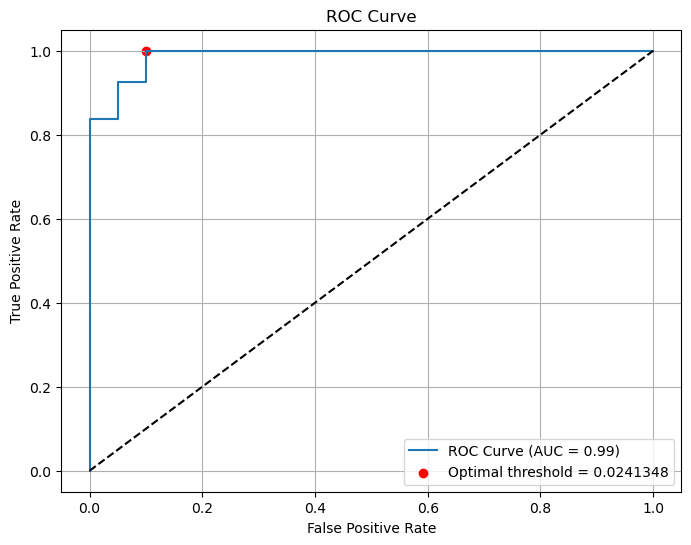


     - AUC: 98.81%
    - Optimal Threshold: 0.0241348
    - F1 Score: 0.99
    - CONFUSION MATRIX:
 [[18  2]
 [ 0 80]] 



    inference all anomaly test: 100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  9.09it/s]


    inference no anomaly test: 100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  9.08it/s]



- OK - Evaluating model (33.28 s)

Dataset               F1 Score
------------------------------
Anonaly lvl 1 test        1.00
Anonaly lvl 2 test        1.00
Anonaly lvl 3 test        1.00

Anomaly all test          1.00

No Anomaly Test           0.95

All test                  0.99


In [20]:
# STEPS = 5000, MODEL TYPE = MEDIUM, WEIGHT = on
model18 = EfficientAD({**config, "train_steps": 5000, "model_type": "medium", "weight_path":"../weights/teacher_medium.pth"})
model18.create_model()
model18.display_eval_result()

In [ ]:
# STEPS = 10000, MODEL TYPE = MEDIUM, WEIGHT = on
model19 = EfficientAD({**config, "train_steps": 10000, "model_type": "medium", "weight_path":"../weights/teacher_medium.pth"})
model19.create_model()
model19.display_eval_result()

In [ ]:
# STEPS = 5000, MODEL TYPE = SMALL, WEIGHT = on Cookies 1
model20 = EfficientAD({**config, "train_steps": 5000, "model_type": "small", "weight_path":"../weights/teacher_small.pth", "subdataset": "cookies_1"})
model20.create_model()
model20.display_eval_result()

### Create model for cookies 2

- Setting seed to 42
- OK - Setting seed to 42 (0.25 ms)

- Setting datasets path
     Dataset paths: dict_keys(['anomaly_lvl_1_test_paths', 'anomaly_lvl_2_test_paths', 'anomaly_lvl_3_test_paths', 'no_anomaly_test_paths', 'all_anomaly_test_paths', 'train_paths', 'test_paths', 'val_paths'])
- OK - Setting datasets path (4.36 ms)

- Setting config
     Output folder path: ../output/cookies_2_steps_5000_small_weighted
- OK - Setting config (0.14 ms)

- Prepare teacher, student & autoencoder
     Loading weight ../weights/teacher_small.pth
     Training
- OK - Prepare teacher, student & autoencoder (77.57 ms)

- Normalizing teacher


    Computing std of features: 100%|██████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 50.70it/s]


- OK - Normalizing teacher (2.83 s)

- Train


       Current loss: 45.0005  :   0%|                                                                                  | 1/5000 [00:01<2:16:40,  1.64s/it]

F1 Validation 0.9743589743589743


       Current loss: 21.3039  :   2%|█▋                                                                                | 101/5000 [00:15<41:08,  1.98it/s]

F1 Validation 0.95


       Current loss: 15.4218  :   4%|███▎                                                                              | 201/5000 [00:29<40:05,  1.99it/s]

F1 Validation 0.9473684210526315


       Current loss: 12.9569  :   6%|████▉                                                                             | 301/5000 [00:43<39:49,  1.97it/s]

F1 Validation 1.0


       Current loss: 12.2017  :   8%|██████▌                                                                           | 401/5000 [00:57<38:36,  1.99it/s]

F1 Validation 1.0


       Current loss: 12.1251  :  10%|████████▏                                                                         | 501/5000 [01:11<37:37,  1.99it/s]

F1 Validation 1.0


       Current loss: 9.4938  :  12%|█████████▉                                                                         | 601/5000 [01:25<37:39,  1.95it/s]

F1 Validation 1.0


       Current loss: 9.2203  :  14%|███████████▋                                                                       | 701/5000 [01:39<36:02,  1.99it/s]

F1 Validation 1.0


       Current loss: 7.6707  :  16%|█████████████▎                                                                     | 801/5000 [01:53<35:40,  1.96it/s]

F1 Validation 1.0


       Current loss: 8.4446  :  18%|██████████████▉                                                                    | 901/5000 [02:07<34:21,  1.99it/s]

F1 Validation 1.0


       Current loss: 7.4782  :  20%|████████████████▍                                                                 | 1001/5000 [02:20<33:44,  1.98it/s]

F1 Validation 1.0


       Current loss: 6.9326  :  22%|██████████████████                                                                | 1101/5000 [02:35<32:53,  1.98it/s]

F1 Validation 1.0


       Current loss: 7.2532  :  24%|███████████████████▋                                                              | 1201/5000 [02:49<32:35,  1.94it/s]

F1 Validation 1.0


       Current loss: 6.8009  :  26%|█████████████████████▎                                                            | 1301/5000 [03:03<32:28,  1.90it/s]

F1 Validation 1.0


       Current loss: 6.8656  :  28%|██████████████████████▉                                                           | 1401/5000 [03:17<30:51,  1.94it/s]

F1 Validation 1.0


       Current loss: 8.0031  :  30%|████████████████████████▌                                                         | 1501/5000 [03:31<29:32,  1.97it/s]

F1 Validation 1.0


       Current loss: 6.6937  :  32%|██████████████████████████▎                                                       | 1601/5000 [03:45<29:02,  1.95it/s]

F1 Validation 1.0


       Current loss: 6.6296  :  34%|███████████████████████████▉                                                      | 1701/5000 [03:59<27:46,  1.98it/s]

F1 Validation 1.0


       Current loss: 7.7260  :  36%|█████████████████████████████▌                                                    | 1800/5000 [04:13<07:30,  7.11it/s]


F1 Validation 1.0
Early stopping at iteration 1801 because validation F1 did not improve.
- OK - Train (253.17 s)

- Saving models to ../output/cookies_2_steps_5000_small_weighted/all_models.pth
- OK - Saving models (66.52 ms)

- Saving map normalization to ../output/cookies_2_steps_5000_small_weighted/map_normalization.pth


     Map normalisation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 28.77it/s]


- OK - Saving map normalization (1008.57 ms)

- Evaluating model


     inference test: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.33it/s]


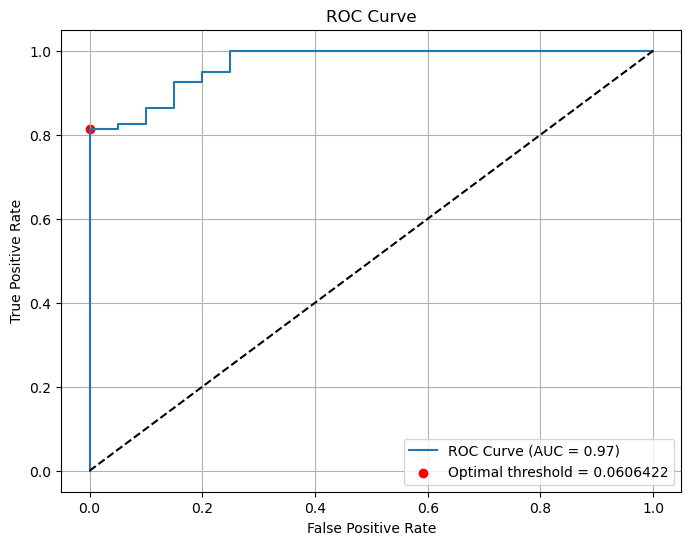


     - AUC: 96.88%
    - Optimal Threshold: 0.0606422
    - F1 Score: 0.90
    - CONFUSION MATRIX:
 [[20  0]
 [15 65]] 



    inference all anomaly test: 100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.32it/s]


    inference no anomaly test: 100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 22.32it/s]



- OK - Evaluating model (13.67 s)

Dataset               F1 Score
------------------------------
Anonaly lvl 1 test        1.00
Anonaly lvl 2 test        0.97
Anonaly lvl 3 test        0.46

Anomaly all test          0.90

No Anomaly Test           1.00

All test                  0.90


In [21]:
# STEPS = 5000, MODEL TYPE = SMALL, WEIGHT = on Cookies 2
model21 = EfficientAD({**config, "train_steps": 5000, "model_type": "small", "weight_path":"../weights/teacher_small.pth", "subdataset": "cookies_2"})
model21.create_model()
model21.display_eval_result()

### Create model for cookies 1

- Setting seed to 42
- OK - Setting seed to 42 (0.60 ms)

- Setting datasets path
     Dataset paths: dict_keys(['anomaly_lvl_1_test_paths', 'anomaly_lvl_2_test_paths', 'anomaly_lvl_3_test_paths', 'no_anomaly_test_paths', 'all_anomaly_test_paths', 'train_paths', 'test_paths', 'val_paths'])
- OK - Setting datasets path (5.18 ms)

- Setting config
     Output folder path: ../output/cookies_1_steps_10000_small_weighted
- OK - Setting config (0.12 ms)

- Prepare teacher, student & autoencoder
     Loading weight ../weights/teacher_small.pth
     Training
- OK - Prepare teacher, student & autoencoder (74.60 ms)

- Normalizing teacher


    Computing std of features: 100%|██████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 51.27it/s]


- OK - Normalizing teacher (2.82 s)

- Train


       Current loss: 29.0107  :   0%|                                                                                 | 1/10000 [00:01<4:27:46,  1.61s/it]

F1 Validation 0.8571428571428571


       Current loss: 16.2858  :   1%|▊                                                                              | 101/10000 [00:15<1:23:02,  1.99it/s]

F1 Validation 0.7878787878787878


       Current loss: 11.0156  :   2%|█▌                                                                             | 201/10000 [00:29<1:22:09,  1.99it/s]

F1 Validation 0.8571428571428571


       Current loss: 10.6710  :   3%|██▍                                                                            | 301/10000 [00:43<1:21:19,  1.99it/s]

F1 Validation 0.8571428571428571


       Current loss: 10.1724  :   4%|███▏                                                                           | 401/10000 [00:57<1:20:11,  2.00it/s]

F1 Validation 0.8571428571428571


       Current loss: 9.2264  :   5%|████                                                                            | 501/10000 [01:11<1:20:38,  1.96it/s]

F1 Validation 0.8571428571428571


       Current loss: 8.6771  :   6%|████▊                                                                           | 601/10000 [01:25<1:18:50,  1.99it/s]

F1 Validation 0.8571428571428571


       Current loss: 9.7556  :   7%|█████▌                                                                          | 701/10000 [01:38<1:18:12,  1.98it/s]

F1 Validation 0.8571428571428571


       Current loss: 8.3746  :   8%|██████▍                                                                         | 801/10000 [01:53<1:17:51,  1.97it/s]

F1 Validation 0.8571428571428571


       Current loss: 9.5946  :   9%|███████▏                                                                        | 901/10000 [02:06<1:15:53,  2.00it/s]

F1 Validation 0.8571428571428571


       Current loss: 8.4501  :  10%|███████▉                                                                       | 1001/10000 [02:20<1:15:38,  1.98it/s]

F1 Validation 0.8571428571428571


       Current loss: 8.2370  :  11%|████████▋                                                                      | 1101/10000 [02:34<1:14:31,  1.99it/s]

F1 Validation 0.8571428571428571


       Current loss: 9.9462  :  12%|█████████▍                                                                     | 1201/10000 [02:48<1:13:50,  1.99it/s]

F1 Validation 0.8888888888888888


       Current loss: 8.4517  :  13%|██████████▎                                                                    | 1301/10000 [03:02<1:15:27,  1.92it/s]

F1 Validation 0.918918918918919


       Current loss: 9.5347  :  14%|███████████                                                                    | 1401/10000 [03:16<1:13:10,  1.96it/s]

F1 Validation 0.8888888888888888


       Current loss: 9.7705  :  15%|███████████▊                                                                   | 1501/10000 [03:30<1:10:52,  2.00it/s]

F1 Validation 0.8888888888888888


       Current loss: 7.7871  :  16%|████████████▋                                                                  | 1601/10000 [03:44<1:11:44,  1.95it/s]

F1 Validation 0.918918918918919


       Current loss: 7.9733  :  17%|█████████████▍                                                                 | 1701/10000 [03:58<1:09:43,  1.98it/s]

F1 Validation 0.8571428571428571


       Current loss: 7.5294  :  18%|██████████████▏                                                                | 1801/10000 [04:12<1:18:35,  1.74it/s]

F1 Validation 0.8571428571428571


       Current loss: 7.6900  :  19%|███████████████                                                                | 1901/10000 [04:26<1:07:50,  1.99it/s]

F1 Validation 0.8571428571428571


       Current loss: 9.6443  :  20%|███████████████▊                                                               | 2001/10000 [04:40<1:06:58,  1.99it/s]

F1 Validation 0.918918918918919


       Current loss: 8.9753  :  21%|████████████████▌                                                              | 2101/10000 [04:54<1:06:31,  1.98it/s]

F1 Validation 0.918918918918919


       Current loss: 7.7862  :  22%|█████████████████▍                                                             | 2201/10000 [05:07<1:05:50,  1.97it/s]

F1 Validation 0.8888888888888888


       Current loss: 7.0736  :  23%|██████████████████▏                                                            | 2301/10000 [05:21<1:04:17,  2.00it/s]

F1 Validation 0.9230769230769231


       Current loss: 6.8569  :  24%|██████████████████▉                                                            | 2401/10000 [05:35<1:04:27,  1.96it/s]

F1 Validation 0.8888888888888888


       Current loss: 6.9773  :  25%|███████████████████▊                                                           | 2501/10000 [05:49<1:04:05,  1.95it/s]

F1 Validation 0.9230769230769231


       Current loss: 7.5698  :  26%|████████████████████▌                                                          | 2601/10000 [06:03<1:02:38,  1.97it/s]

F1 Validation 0.9230769230769231


       Current loss: 7.0992  :  27%|█████████████████████▎                                                         | 2701/10000 [06:17<1:00:54,  2.00it/s]

F1 Validation 0.918918918918919


       Current loss: 6.8597  :  28%|██████████████████████▏                                                        | 2801/10000 [06:31<1:00:27,  1.98it/s]

F1 Validation 0.8888888888888888


       Current loss: 6.6128  :  29%|███████████████████████▍                                                         | 2901/10000 [06:45<59:38,  1.98it/s]

F1 Validation 0.8888888888888888


       Current loss: 7.6677  :  30%|████████████████████████▎                                                        | 3001/10000 [06:59<58:52,  1.98it/s]

F1 Validation 0.8888888888888888


       Current loss: 5.8616  :  31%|████████████████████████▍                                                      | 3101/10000 [07:13<1:00:03,  1.91it/s]

F1 Validation 0.8888888888888888


       Current loss: 7.1846  :  32%|█████████████████████████▉                                                       | 3201/10000 [07:27<57:01,  1.99it/s]

F1 Validation 0.918918918918919


       Current loss: 6.9880  :  33%|██████████████████████████▋                                                      | 3301/10000 [07:41<56:16,  1.98it/s]

F1 Validation 0.8888888888888888


       Current loss: 5.6562  :  34%|███████████████████████████▌                                                     | 3401/10000 [07:55<55:38,  1.98it/s]

F1 Validation 0.918918918918919


       Current loss: 6.5604  :  35%|████████████████████████████▎                                                    | 3501/10000 [08:08<54:08,  2.00it/s]

F1 Validation 0.918918918918919


       Current loss: 6.4236  :  36%|████████████████████████████▍                                                  | 3601/10000 [08:23<1:01:09,  1.74it/s]

F1 Validation 0.95


       Current loss: 5.4188  :  37%|█████████████████████████████▉                                                   | 3701/10000 [08:36<52:52,  1.99it/s]

F1 Validation 0.918918918918919


       Current loss: 5.6183  :  38%|██████████████████████████████▊                                                  | 3801/10000 [08:50<52:06,  1.98it/s]

F1 Validation 0.8888888888888888


       Current loss: 5.4557  :  39%|███████████████████████████████▌                                                 | 3901/10000 [09:04<51:20,  1.98it/s]

F1 Validation 0.8888888888888888


       Current loss: 5.8281  :  40%|████████████████████████████████▍                                                | 4001/10000 [09:18<50:06,  2.00it/s]

F1 Validation 0.918918918918919


       Current loss: 6.3562  :  41%|█████████████████████████████████▏                                               | 4101/10000 [09:32<49:33,  1.98it/s]

F1 Validation 0.8888888888888888


       Current loss: 4.9683  :  42%|██████████████████████████████████                                               | 4201/10000 [09:46<49:08,  1.97it/s]

F1 Validation 0.8888888888888888


       Current loss: 6.6889  :  43%|██████████████████████████████████▊                                              | 4301/10000 [10:00<47:50,  1.99it/s]

F1 Validation 0.918918918918919


       Current loss: 6.5786  :  44%|███████████████████████████████████▋                                             | 4401/10000 [10:14<47:31,  1.96it/s]

F1 Validation 0.8888888888888888


       Current loss: 6.2688  :  45%|████████████████████████████████████▍                                            | 4501/10000 [10:28<45:47,  2.00it/s]

F1 Validation 0.8888888888888888


       Current loss: 5.7612  :  46%|█████████████████████████████████████▎                                           | 4601/10000 [10:41<45:10,  1.99it/s]

F1 Validation 0.8888888888888888


       Current loss: 5.4185  :  47%|██████████████████████████████████████                                           | 4701/10000 [10:55<44:18,  1.99it/s]

F1 Validation 0.918918918918919


       Current loss: 4.9782  :  48%|██████████████████████████████████████▉                                          | 4801/10000 [11:09<43:35,  1.99it/s]

F1 Validation 0.8888888888888888


       Current loss: 5.3264  :  49%|███████████████████████████████████████▋                                         | 4901/10000 [11:23<44:11,  1.92it/s]

F1 Validation 0.8888888888888888


       Current loss: 4.9857  :  50%|████████████████████████████████████████▌                                        | 5001/10000 [11:37<41:55,  1.99it/s]

F1 Validation 0.918918918918919


       Current loss: 5.9820  :  51%|█████████████████████████████████████████▎                                       | 5100/10000 [11:51<11:23,  7.17it/s]


F1 Validation 0.8888888888888888
Early stopping at iteration 5101 because validation F1 did not improve.
- OK - Train (711.43 s)

- Saving models to ../output/cookies_1_steps_10000_small_weighted/all_models.pth
- OK - Saving models (65.02 ms)

- Saving map normalization to ../output/cookies_1_steps_10000_small_weighted/map_normalization.pth


     Map normalisation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 28.63it/s]


- OK - Saving map normalization (1013.09 ms)

- Evaluating model


     inference test: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.14it/s]


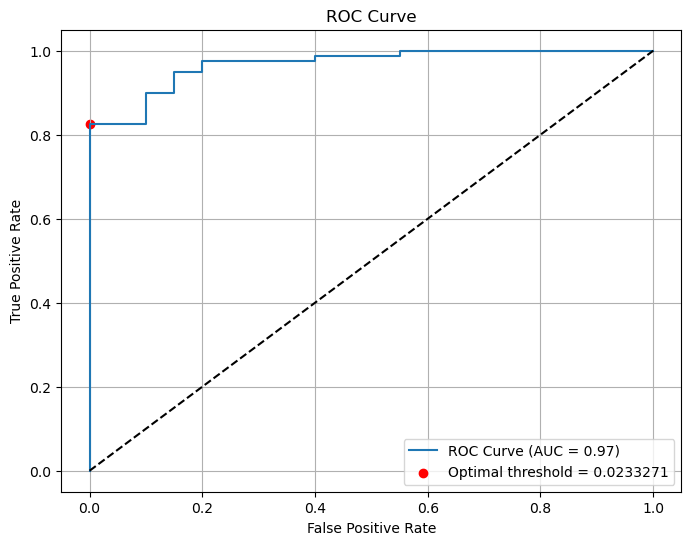


     - AUC: 96.81%
    - Optimal Threshold: 0.0233271
    - F1 Score: 0.90
    - CONFUSION MATRIX:
 [[20  0]
 [14 66]] 



    inference all anomaly test: 100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.39it/s]


    inference no anomaly test: 100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 22.53it/s]



- OK - Evaluating model (13.67 s)

Dataset               F1 Score
------------------------------
Anonaly lvl 1 test        1.00
Anonaly lvl 2 test        1.00
Anonaly lvl 3 test        0.46

Anomaly all test          0.90

No Anomaly Test           1.00

All test                  0.90


In [22]:
# STEPS = 10000, MODEL TYPE = SMALL, WEIGHT = on Cookies 1
model22 = EfficientAD({**config, "train_steps": 10000, "model_type": "small", "weight_path":"../weights/teacher_small.pth", "subdataset": "cookies_1"})
model22.create_model()
model22.display_eval_result()